In [75]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, average_precision_score, f1_score

# train XGBoost
# check the loading path before running the script

## feature_T1 - no woe - test_data: best aucpr 0.5502431743045912, recall 0.8874937217478654 
- fetching data site: "./selected_feature_T1.p", hyperparam site: "./cv_optimal_params_with_paramgrid2.p"
- saved model: xgb_model_trained_T1.p"

## with woe - test_data: best aucpr 0.5570952700328535, recall 0.903566047212456
- fetching data site: "./woe_data_model/selected_feature_woe.p", hyperparam site: "./woe_data_model/cv_optimal_params_with_paramgrid2.p"
- saved model:

# conclude: using woe transformation leads to better recall value



In [76]:
data = pickle.load(open( "./woe_data_model/selected_feature_woe.p", "rb" ) )
X = data["X"]
y = data["y"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10, stratify=y)

In [77]:
best_params = pickle.load(open( "./woe_data_model/cv_optimal_params_with_paramgrid2.p", "rb" ) )
best_params

{'optimal_params': GridSearchCV(cv=3,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=0.8, gamma=None,
                                      gpu_id=None, importance_type='gain',
                                      interaction_constraints=None,
                                      learning_rate=None, max_delta_step=None,
                                      max_depth=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      n_estimators=100, n_jobs=None,
                                      num_parallel_tree=None, random_state=10,
                                      reg_alpha=None, reg_lambda=None,
                                      scale_pos_weight=None, subsample=0.8,
                          

In [78]:
best_params_to_use = best_params["optimal_params"].best_params_
best_params_to_use

{'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 6,
 'reg_lambda': 30,
 'scale_pos_weight': 3}

In [79]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state = 10, 
                                                             gamma = 1,
                                                          reg_lambda = 10,
                                                            max_depth = 6,
                                                      scale_pos_weight = 9,
                                                       learning_rate = 0.1,
                                                       colsample_bytree=0.8,subsample=0.8,
                              
                                                            use_label_encoder=False)

In [80]:
xgb_model.fit(X_train, y_train, verbose=True, early_stopping_rounds = 10, eval_metric="aucpr",eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.50969
[1]	validation_0-aucpr:0.51832
[2]	validation_0-aucpr:0.52745
[3]	validation_0-aucpr:0.52526
[4]	validation_0-aucpr:0.53125
[5]	validation_0-aucpr:0.53371
[6]	validation_0-aucpr:0.53594
[7]	validation_0-aucpr:0.53305
[8]	validation_0-aucpr:0.53563
[9]	validation_0-aucpr:0.53881
[10]	validation_0-aucpr:0.53979
[11]	validation_0-aucpr:0.54033
[12]	validation_0-aucpr:0.54122
[13]	validation_0-aucpr:0.54102
[14]	validation_0-aucpr:0.54410
[15]	validation_0-aucpr:0.54466
[16]	validation_0-aucpr:0.54554
[17]	validation_0-aucpr:0.54778
[18]	validation_0-aucpr:0.54580
[19]	validation_0-aucpr:0.54568
[20]	validation_0-aucpr:0.54671
[21]	validation_0-aucpr:0.55068
[22]	validation_0-aucpr:0.55139
[23]	validation_0-aucpr:0.55185
[24]	validation_0-aucpr:0.55242
[25]	validation_0-aucpr:0.55196
[26]	validation_0-aucpr:0.55212
[27]	validation_0-aucpr:0.55179
[28]	validation_0-aucpr:0.55308
[29]	validation_0-aucpr:0.55450
[30]	validation_0-aucpr:0.55390
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=10,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=9, subsample=0.8,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [81]:
evals_result = xgb_model.evals_result()
evals_result

{'validation_0': OrderedDict([('aucpr',
               [0.509689,
                0.518321,
                0.527453,
                0.525255,
                0.531252,
                0.533712,
                0.535938,
                0.533051,
                0.53563,
                0.538808,
                0.539787,
                0.540333,
                0.541225,
                0.541025,
                0.544102,
                0.544664,
                0.54554,
                0.547782,
                0.545802,
                0.545675,
                0.54671,
                0.550678,
                0.551395,
                0.551851,
                0.552424,
                0.551958,
                0.552119,
                0.551791,
                0.553082,
                0.554499,
                0.553896,
                0.554819,
                0.554644,
                0.553017,
                0.55251,
                0.552886,
                0.554337,
  

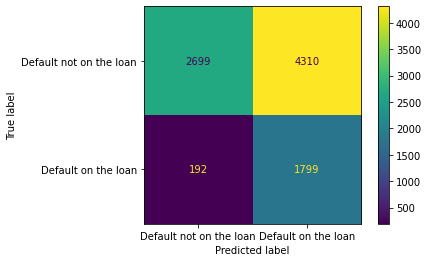

In [82]:
plot_confusion_matrix(xgb_model, X_test,y_test, display_labels=["Default not on the loan", "Default on the loan"])

In [83]:
y_pred = xgb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
recall_val = cm[1,1] / (cm[1,0]+cm[1,1])
recall_val

0.903566047212456

In [84]:
y_prob = xgb_model.predict_proba(X_test)
average_precision_score(y_test, y_prob[:,1])


0.5570952700328535

In [85]:
f1 = f1_score(y_test, y_pred)
f1

0.44419753086419744

# Save

In [86]:
pickle.dump({'xgb_model', xgb_model}, open( "./woe_data_model/xgb_model_trained_woe.p", "wb" ) )